In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

path = 'https://github.com/oregon-data-science/DSCI101/raw/main/data/'

"imports complete" 

'imports complete'

## Bootstrap review: San Francisco City Salaries

In [4]:
## All the data, the complete "population" (the probability distribution) 
sf_pop = Table.read_table(path + 'san_francisco_2015.csv')

## drop bad income values
sf_pop = sf_pop.where('Total Compensation', are.above(10*40*52))
pop_median = percentile(50, sf_pop.column('Total Compensation'))
print("True population median is $", pop_median)

## our random sample surveyed from the population,
## with_replacement = False because we are not surveying the same people more than once
our_sample = sf_pop.sample(300, with_replacement = False)
print("Sample median is $", percentile(50, our_sample.column('Total Compensation')))

True population median is $ 112965.15
Sample median is $ 106226.59


/opt/conda/lib/python3.10/site-packages/datascience/tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


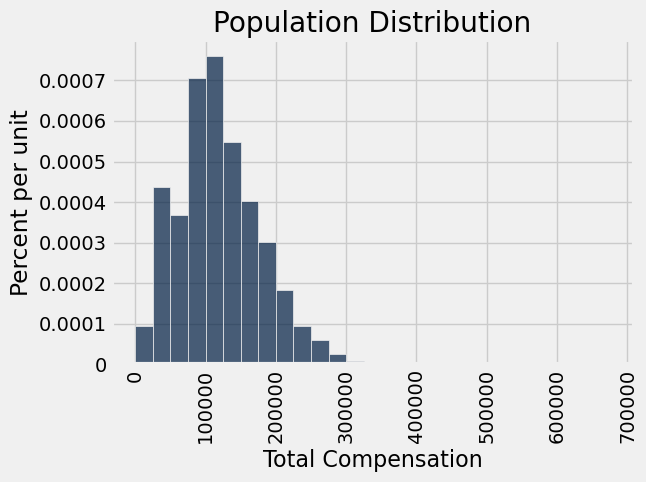

In [5]:
## true population 
sf_bins = np.arange(0, 700000, 25000)
sf_pop.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

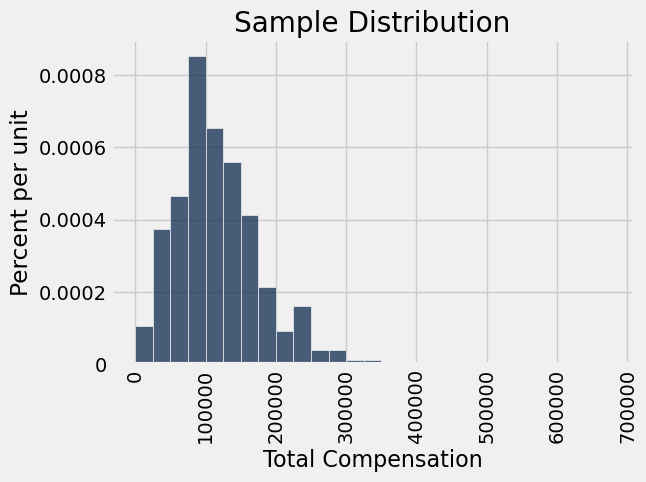

In [6]:
## Our sample
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

In [11]:
## our function to draw
def one_bootstrap_median():
    single_sample = our_sample.sample(300, with_replacement = True)
    return percentile(50, single_sample.column('Total Compensation'))

med_bins = np.arange(90000, 125001, 2500)

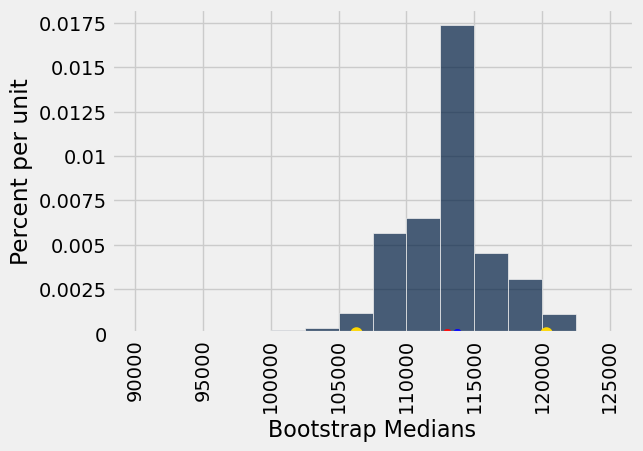

In [12]:
## Let's do the whole CI bootstrap estimation process, all at once: 
## 1. take a sample, 

our_sample = sf_pop.sample(300, with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))


## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(2.5, bootstrap_medians) ## the lower bound of the CI
right = percentile(97.5, bootstrap_medians) ## the upper bound of the CI

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.scatter([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

In [7]:
## back to slides

In [13]:
## Discussion question: Let's do the whole CI bootstrap estimation process, all at once: 
## 1. take a sample from your population 

our_sample = sf_pop.sample(..., with_replacement = False)
our_sample_median = percentile(50, our_sample.column('Total Compensation'))

## our function to calculate the median of samples
def one_bootstrap_median():
    single_sample = our_sample.sample(..., with_replacement = True)
    return percentile(50, single_sample.column('Total Compensation'))

## 2. use it to make many bootstrap samples,

bootstrap_medians = make_array()
for i in np.arange(...):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)


## 3. and use the middle 95% of the bootstrap medians as our confidence interval

left = percentile(2.5, bootstrap_medians) ## lower bound CI
right = percentile(97.5, bootstrap_medians) ## upper bound CI

Table().with_column('Bootstrap Medians', bootstrap_medians).hist('Bootstrap Medians', bins=med_bins)
plots.scatter([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(pop_median, 0, color="red", zorder=2);
plots.scatter(our_sample_median, 0, color="blue", zorder=2);

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'ellipsis'

## Bootstrap Review: Mean Maternal Age

In [17]:
## our baby birth data from a-b testing, but this time we are going to examine maternal age
births = Table.read_table(path + 'baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


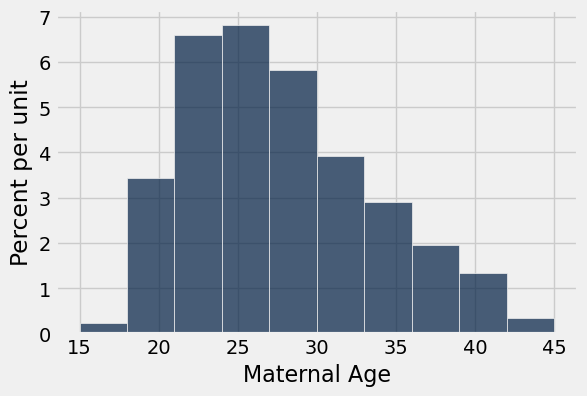

In [18]:
births.hist('Maternal Age')

In [47]:
births.num_rows

1174

In [70]:
mean_age = np.mean(births.column('Maternal Age'))
print("True population mean is", mean_age)

number_samples = 500

## our random sample surveyed from the population,
## with_replacement = False because we are not surveying the same people more than once
our_sample = births.sample(number_samples, with_replacement = False)
sample_mean = np.mean(our_sample.column('Maternal Age'))

print("Sample mean is", sample_mean)

True population mean is 27.2282793867
Sample mean is 27.408


In [71]:
def one_bootstrap_mean():
    return np.mean(births.sample(number_samples, with_replacement = True).column('Maternal Age'))

In [72]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means) ## lower bound
right = percentile(97.5, bootstrap_means) ## upper bound

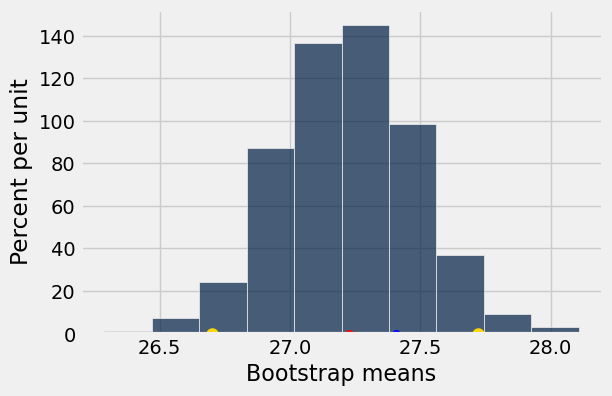

In [73]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.scatter([left, right], [0,0], color="gold",lw=3, zorder=1);
plots.scatter(mean_age, 0, color="red", zorder=2);
plots.scatter(sample_mean, 0, color="blue", zorder=2);

In [ ]:
## back to slides

## Average (Mean) ##

In [ ]:
values = make_array(2, 3, 3, 9)

In [ ]:
sum(values)/len(values)

In [ ]:
np.average(values)

In [ ]:
np.mean(values)

In [ ]:
(2 + 3 + 3 + 9)/4

In [ ]:
2*(1/4) + 3*(2/4) + 9*(1/4)

In [ ]:
values_table = Table().with_columns('value', values)
values_table

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [ ]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

In [ ]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [ ]:
np.average(values)

In [ ]:
np.average(new_vals)

### Discussion Question

In [ ]:
nba = Table.read_table(path + 'nba2013.csv')
nba

In [ ]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [ ]:
heights = nba.column('Height')

## median
percentile(50, heights)

In [ ]:
## mean
np.mean(heights)

In [ ]:
## back to slides

## Standard Deviation ##

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

In [ ]:
average_value = np.average(sd_table.column(0))
average_value

In [ ]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

In [ ]:
sum(deviations)

In [ ]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

In [ ]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

In [ ]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

In [ ]:
np.std(values)

In [ ]:
## back to slides